# 206. Reverse Linked List

# 🔹 Dry Run of `reverseList`

### Input
head = [1 → 2 → 3 → 4 → 5]




| Step      | `curr` value | `next_node` value | `prev` before | Operation performed         | `prev` after | `curr` after | List direction after change  |
| --------- | ------------ | ----------------- | ------------- | --------------------------- | ------------ | ------------ | ---------------------------- |
| **Start** | 1            | -                 | None          | Loop not started            | None         | 1            | 1 → 2 → 3 → 4 → 5            |
| **1**     | 1            | 2                 | None          | `curr.next = prev` → 1→None | 1            | 2            | **1 → None**, 2 → 3 → 4 → 5  |
| **2**     | 2            | 3                 | 1             | `curr.next = prev` → 2→1    | 2            | 3            | **2 → 1 → None**, 3 → 4 → 5  |
| **3**     | 3            | 4                 | 2             | `curr.next = prev` → 3→2    | 3            | 4            | **3 → 2 → 1 → None**, 4 → 5  |
| **4**     | 4            | 5                 | 3             | `curr.next = prev` → 4→3    | 4            | 5            | **4 → 3 → 2 → 1 → None**, 5  |
| **5**     | 5            | None              | 4             | `curr.next = prev` → 5→4    | 5            | None         | **5 → 4 → 3 → 2 → 1 → None** |



### ✅ Final Output
Reversed List: 5 → 4 → 3 → 2 → 1



In [6]:
from typing import Optional
class ListNode:
    def __init__(self, val=0, next = None):
        self.val = val
        self.next =next
class Solution:
    def reverseList(self, head: Optional[ListNode]) -> Optional[ListNode]:
        prev = None
        curr = head #1
        while curr:
            next_node = curr.next #2
            curr.next = prev #1->None
            prev = curr
            curr = next_node
        return prev    

# -------------------------
# Create LL: 1 -> 2 -> 3 -> 4 -> 5
# -------------------------

head = ListNode(1)
head.next = ListNode(2)
head.next.next = ListNode(3)
head.next.next.next = ListNode(4)
head.next.next.next.next = ListNode(5)

# Reverse
sol = Solution()
new_head = sol.reverseList(head)

# Print reversed list
curr = new_head
while curr:
    print(curr.val, end=" -> ")
    curr = curr.next
print("None")



5 -> 4 -> 3 -> 2 -> 1 -> None


# 21. Merge Two Sorted Lists

# 🔹 Dry Run of `mergeTwoLists` (Recursive)

**Input**  
list1 = [1 → 2 → 4]

list2 = [1 → 3 → 4]



---

## Step-by-Step Execution

| Step | list1.val | list2.val | Condition Checked | Action Taken | Returned Head |
|------|-----------|-----------|-------------------|--------------|---------------|
| 1    | 1         | 1         | 1 <= 1 ✅          | list1.next = mergeTwoLists([2,4], [1,3,4]) | list1 (1) |
| 2    | 2         | 1         | 2 <= 1 ❌          | list2.next = mergeTwoLists([2,4], [3,4])  | list2 (1) |
| 3    | 2         | 3         | 2 <= 3 ✅          | list1.next = mergeTwoLists([4], [3,4])    | list1 (2) |
| 4    | 4         | 3         | 4 <= 3 ❌          | list2.next = mergeTwoLists([4], [4])      | list2 (3) |
| 5    | 4         | 4         | 4 <= 4 ✅          | list1.next = mergeTwoLists([], [4])       | list1 (4) |
| 6    | None      | 4         | list1 is None ✅    | return list2 ([4])                        | list2 (4) |

---

## ✅ Recursive Linking Back

- Step 6 returns **[4]**  
- Step 5 attaches → **[4 → 4]**  
- Step 4 attaches → **[3 → 4 → 4]**  
- Step 3 attaches → **[2 → 3 → 4 → 4]**  
- Step 2 attaches → **[1 → 2 → 3 → 4 → 4]**  
- Step 1 attaches → **[1 → 1 → 2 → 3 → 4 → 4]**

---

## 🎯 Final Output

Merged List = [1 → 1 → 2 → 3 → 4 → 4]




In [ ]:
class Solution:
    def mergeTwoLists(self, list1: Optional[ListNode], list2: Optional[ListNode]) -> Optional[ListNode]:
        if not list1:
            return list2
        if not list2:
            return list1
        if list1.val <= list2.val:
            list1.next = self.mergeTwoLists(list1.next, list2)
            return list1
        else:
            list2.next = self.mergeTwoLists(list1, list2.next)
            return list2
    

# 203. Remove Linked List Elements

# 🔹 Dry Run of removeElements

Initial list:
1 → 2 → 3, and we want to remove: val = 2  

Dummy list looks like:   
0 → 1 → 2 → 3
---

## Step-by-Step Execution

| Step      | `current` node value | `current.next` value | Condition `current.next.val == 2`? | Action        | New Links After Action | Pointer move?                       |
| --------- | -------------------- | -------------------- | ---------------------------------- | ------------- | ---------------------- | ----------------------------------- |
| **Start** | 0 (dummy)            | 1                    | 1 == 2 ❌                           | else          | no change              | `current = current.next` → now at 1 |
| **1**     | 1                    | 2                    | 2 == 2 ✔                           | delete node 2 | `1.next = 3`           | `current` stays at 1                |
| **2**     | 1                    | 3                    | 3 == 2 ❌                           | else          | no change              | `current = current.next` → now at 3 |
| **3**     | 3                    | None → loop stops    | -                                  | loop ends     | -                      | -                                   |

---

## Linking After Removal
✅ Final Linked List After Removal

After node 2 is removed:

1 → 3

(dummy.next points to 1)




In [8]:
class Solution:
    def removeElements(self, head, val):
        dummy = ListNode(0) #0
        dummy.next = head #1
        current = dummy #0
        while current.next: 
            if current.next.val == val: #3==2
                current.next = current.next.next #1.next=3
            else:
                current = current.next #3
        return dummy.next            


# 141 - Linked List Cycle


List: 1 → 2 → 3 → 4 → 5 → 6 → 3 (cycle back to node 3)

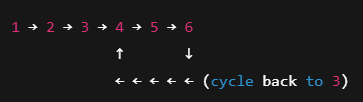

| Step  | slow moves to | fast moves to | Meet? | Notes                              |
| ----- | ------------- | ------------- | ----- | ---------------------------------- |
| Start | 1             | 1             | ❌     | both start at head                 |
| 1     | 2             | 3             | ❌     | slow: 1→2, fast: 1→3               |
| 2     | 3             | 5             | ❌     | slow: 2→3, fast: 3→5               |
| 3     | 4             | 3             | ❌     | slow: 3→4, fast: 5→6→**3 (cycle)** |
| 4     | 5             | 5             | ✅     | slow: 4→5, fast: 3→5 → they meet   |


In [ ]:
class Solution:
    def hasCycle(self, head):
        slow = head # 1
        fast = head #1
        while fast and fast.next:
            #slow=2,3,4,5
            slow = slow.next # move 1 step
            #fast = 3,5,3,5
            fast = fast.next.next # move 2 step
            if slow == fast: #2==3,3==5,4==3, 5==5
                return True
        return False            

# 19 - Remove Nth Node From End of List


head = [1, 2, 3, 4, 5], n = 2


We want to remove the 2nd node from the end → 4.   
| Step | Code                          | Action                       | First Pointer | Second Pointer | List State                        |
|------|-------------------------------|-------------------------------|---------------|----------------|----------------------------------|
| 0    | `dummy = ListNode(0, head)`  | Create dummy node             | -             | -              | [0] → 1 → 2 → 3 → 4 → 5 → NULL  |
| 1    | `first = dummy`               | Set first to dummy            | [0]           | [0]            | [0] → 1 → 2 → 3 → 4 → 5 → NULL  |
| 2    | `second = dummy`              | Set second to dummy           | [0]           | [0]            | [0] → 1 → 2 → 3 → 4 → 5 → NULL  |
| 3.1  | `first = first.next`          | Move first 1 step             | [1]           | [0]            | [0] → 1 → 2 → 3 → 4 → 5 → NULL  |
| 3.2  | `first = first.next`          | Move first 2 steps            | [2]           | [0]            | [0] → 1 → 2 → 3 → 4 → 5 → NULL  |
| 3.3  | `first = first.next`          | Move first 3 steps            | [3]           | [0]            | [0] → 1 → 2 → 3 → 4 → 5 → NULL  |
| 4.1  | `first = first.next`          | Move both pointers            | [4]           | [1]            | [0] → 1 → 2 → 3 → 4 → 5 → NULL  |
| 4.2  | `second = second.next`        |                               | [4]           | [1]            | [0] → 1 → 2 → 3 → 4 → 5 → NULL  |
| 4.3  | `first = first.next`          | Move both pointers            | [5]           | [2]            | [0] → 1 → 2 → 3 → 4 → 5 → NULL  |
| 4.4  | `second = second.next`        |                               | [5]           | [2]            | [0] → 1 → 2 → 3 → 4 → 5 → NULL  |
| 4.5  | `first = first.next`          | Move both pointers            | NULL          | [3]            | [0] → 1 → 2 → 3 → 4 → 5 → NULL  |
| 4.6  | `second = second.next`        |                               | NULL          | [3]            | [0] → 1 → 2 → 3 → 4 → 5 → NULL  |
| 5    | `second.next = second.next.next` | Remove nth node             | NULL          | [3]            | [0] → 1 → 2 → 3 → 5 → NULL      |
| 6    | `return dummy.next`           | Return new head               | -             | -              | 1 → 2 → 3 → 5 → NULL             |

[1, 2, 3, 5]


⭐ Why 4 gets deleted?  
Because:  
second was at node 3  
second.next = node 4  
second.next.next = node 5  
So we do:  
3.next = 5  
Thus 4 gets skipped → deleted.

In [10]:
class Solution:
    def removeNthFromEnd(self, head: ListNode, n:int)-> ListNode:
        dummy = ListNode(0,head)
        first = dummy
        second = dummy 
        for _ in range(n+1): #range(3) , 0,1,2,3
            first = first.next #1,2,3, null
        # move both unit first reach to end
        while first:
            first = first.next #4,5
            second = second.next  #1,2,3

        # remove the nth node
        second.next = second.next.next #4
        #3.next =5
        return dummy.next       